In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

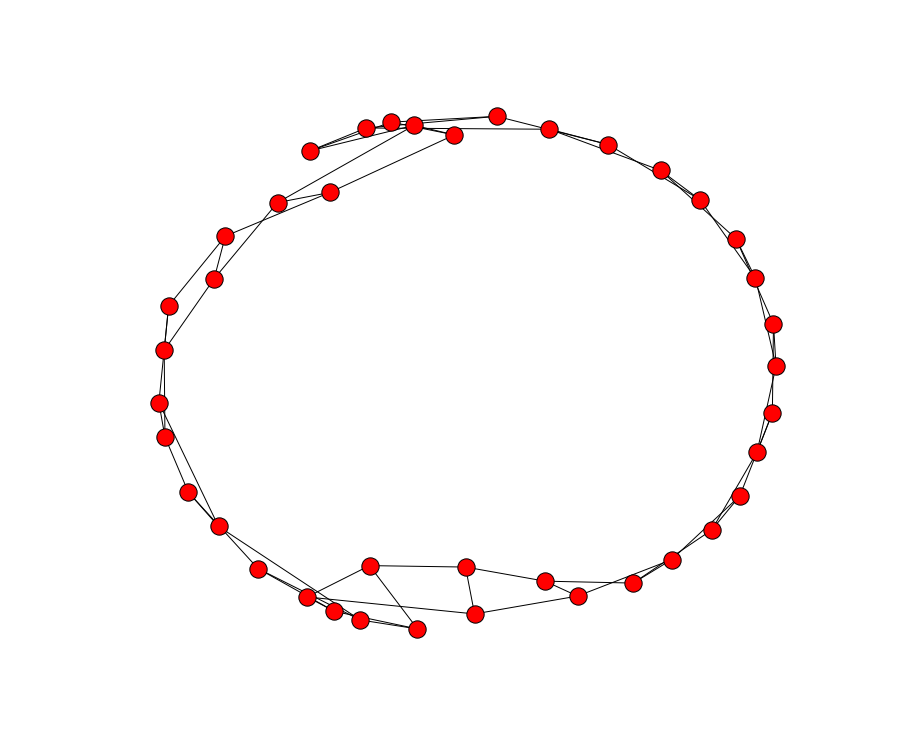

In [2]:
g = nx.circular_ladder_graph(20)
nx.draw_spring(g)

In [3]:
for i in range(10):
    print()

In [4]:
# Circle

n_rotations = 40
n_samples = 10
sd = 0.1

r = 2

xs,ys = np.array([]), np.array([])

for i in range(n_rotations):
    x = r * np.cos(i)
    y = r * np.sin(i)
    xs = np.append(xs, np.random.normal(x,sd,[n_samples]))
    ys = np.append(ys, np.random.normal(y,sd,[n_samples]))
xs = np.expand_dims(xs,1)
ys = np.expand_dims(ys,1)

In [5]:
data = np.concatenate([xs,ys],axis=1)

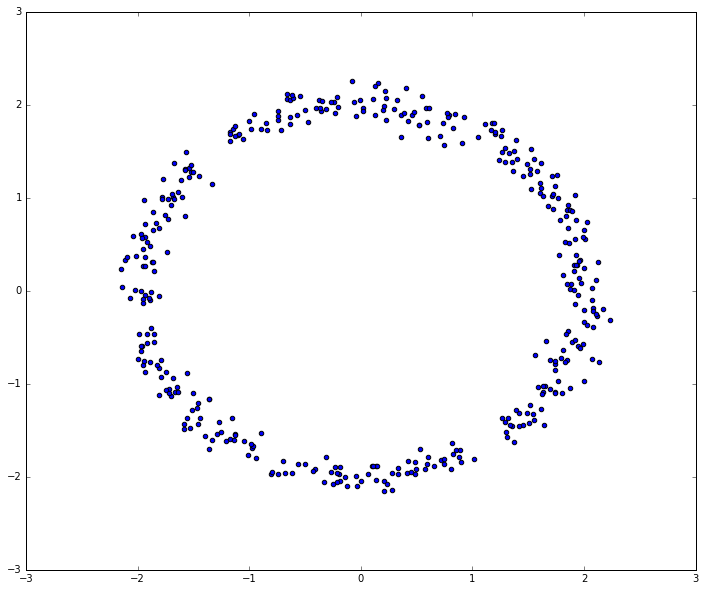

In [6]:
plt.scatter(xs, ys)

In [7]:
# Torus

i_rotations = 100
j_rotations = 20
n_samples = 10
sd = 0.3

c = 5 # circle radius
a = 1 # tube radius

xs,ys,zs = np.array([]), np.array([]), np.array([])

for i in range(i_rotations):
    for j in range(j_rotations):
        x = (c + a*np.cos(j)) * np.cos(i)
        y = (c + a*np.cos(j)) * np.sin(i)
        z = a*np.sin(j)
        
        xs = np.append(xs, np.random.normal(x,sd,[n_samples]))
        ys = np.append(ys, np.random.normal(y,sd,[n_samples]))
        zs = np.append(zs, np.random.normal(z,sd,[n_samples]))
        
xs = np.expand_dims(xs,1)
ys = np.expand_dims(ys,1)
zs = np.expand_dims(zs,1)

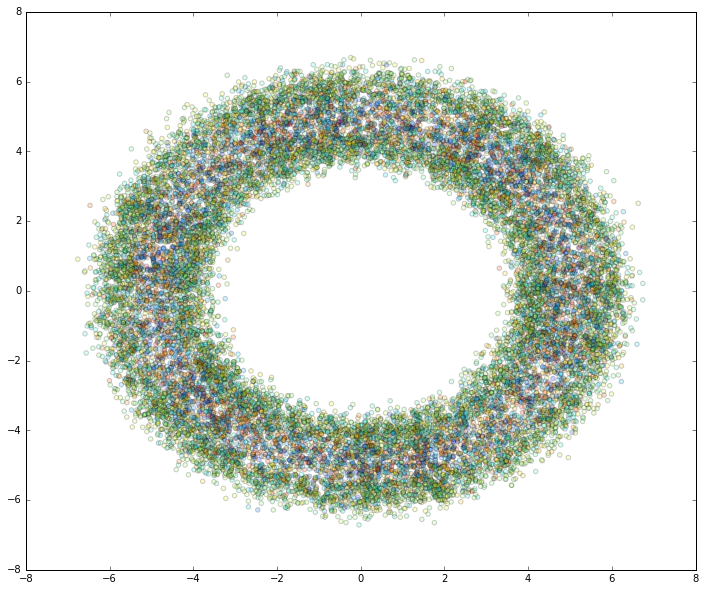

In [8]:
plt.scatter(xs, ys, c=zs, alpha=0.2)

https://www.reddit.com/user/Philip_Pugeau has posted about a notation that can describe high dimensional shapes like tori in a rather concise form. It'd be cool to write some code that could parse that notation and come up with the necessary parametric equations for it, then sample points from that shape.

https://www.reddit.com/r/hypershape/
https://www.reddit.com/r/hypershape/comments/54m4t2/tree_graphs_of_a000669_for_spheres_and_higher/

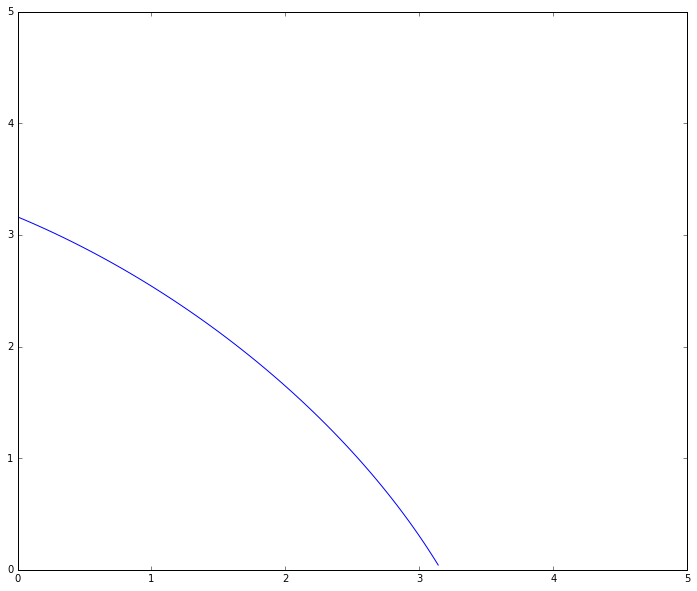

In [9]:
from functools import partial

import numpy
import scipy.optimize
import matplotlib.pyplot as pp

def z(x, y):
    return x ** 2 + x * y + y ** 2 - 10

x_window = 0, 5
y_window = 0, 5

xs = []
ys = []
for x in numpy.linspace(*x_window, num=200):
    try:
        # A more efficient technique would use the last-found-y-value as a 
        # starting point
        y = scipy.optimize.brentq(partial(z, x), *y_window)
    except ValueError:
        # Should we not be able to find a solution in this window.
        pass
    else:
        xs.append(x)
        ys.append(y)

pp.plot(xs, ys)
pp.xlim(*x_window)
pp.ylim(*y_window)
pp.show()

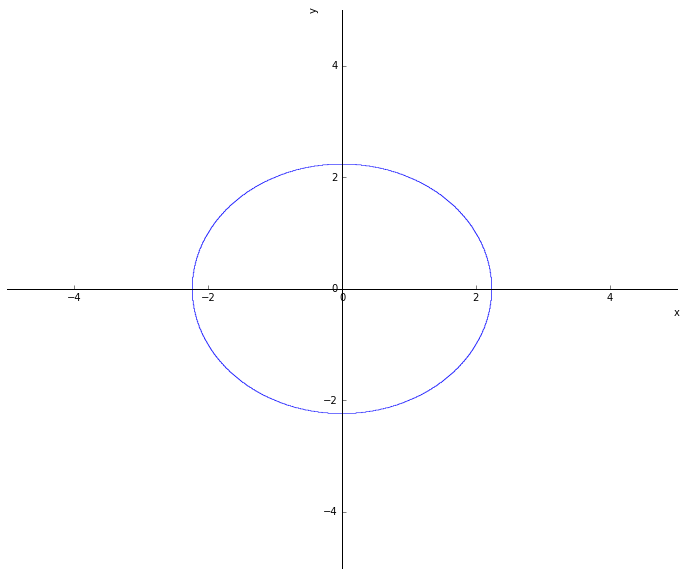

In [10]:
from sympy import plot_implicit, cos, sin, symbols, Eq, And
x, y = symbols('x y')
p1 = plot_implicit(Eq(x**2 + y**2, 5))

In [11]:
# http://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

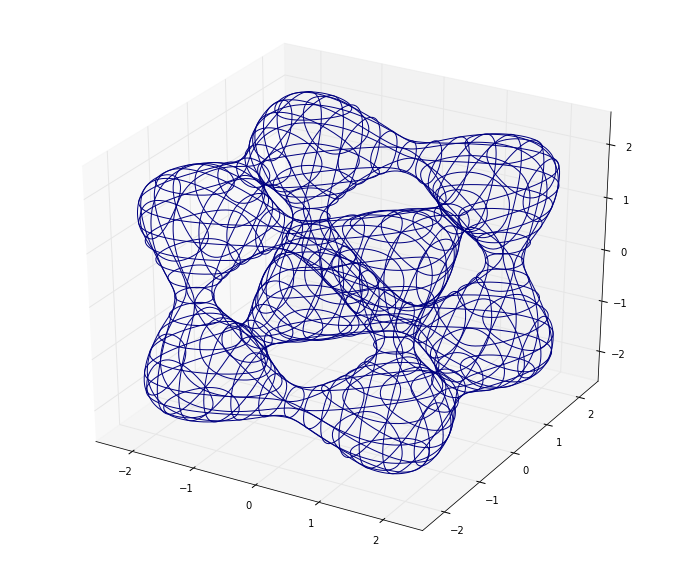

In [125]:
def goursat_tangle(x,y,z):
    a,b,c = 0.0,-5.0,11.8
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c

plot_implicit(goursat_tangle)

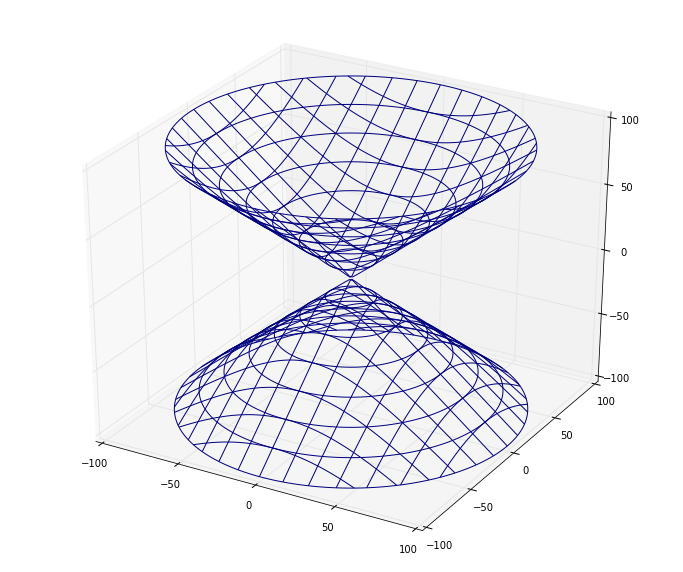

In [126]:
def hyp_part1(x,y,z):
    return -(x**2) - (y**2) + (z**2) - 1

plot_implicit(hyp_part1, bbox=(-100.,100.))

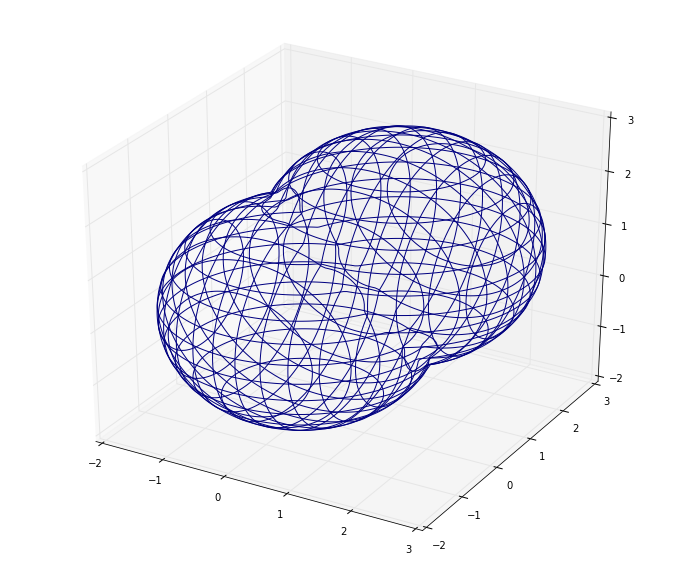

In [127]:
def sphere(x,y,z):
    return x**2 + y**2 + z**2 - 2.0**2

def translate(fn,x,y,z):
    return lambda a,b,c: fn(x-a,y-b,z-c)

def union(*fns):
    return lambda x,y,z: np.min(
        [fn(x,y,z) for fn in fns], 0)

def intersect(*fns):
    return lambda x,y,z: np.max(
        [fn(x,y,z) for fn in fns], 0)

def subtract(fn1, fn2):
    return intersect(fn1, lambda *args:-fn2(*args))

plot_implicit(union(sphere,translate(sphere, 1.,1.,1.)), (-2.,3.))

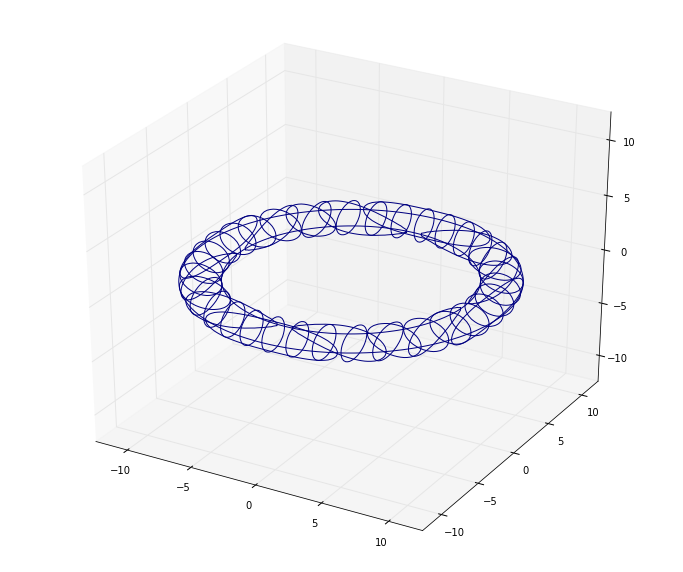

In [200]:
def torus(x,y,z):
    """((II)I)"""
    r1 = 10
    r2 = 2
    return ((x**2 + y**2)**(1/2) - r1)**2 + z**2 - r2
    
plot_implicit(torus, bbox=(-12,12))

In [202]:
bbox=(-12,12)
xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
A = np.linspace(xmin, xmax, 200) # resolution of the contour
B = np.linspace(xmin, xmax, 15) # number of slices

In [203]:
X1,X2,X3 = np.meshgrid(A,A,A)

In [204]:
t = torus(X1,X2,X3)

In [205]:
t[0].shape

(200, 200)

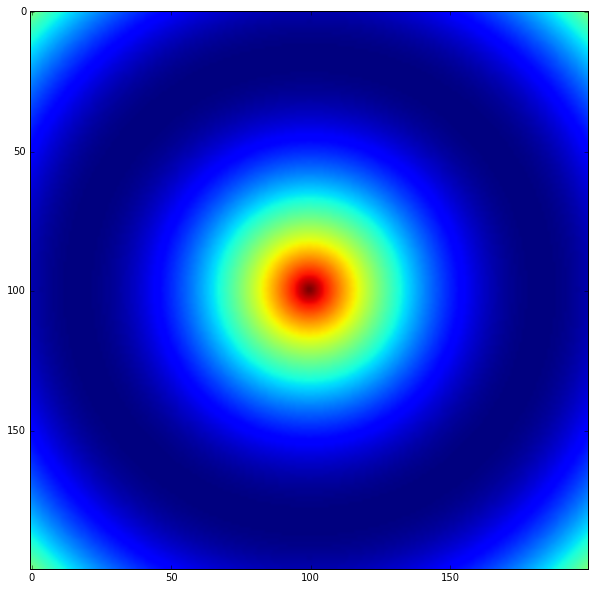

In [206]:
plt.imshow(t[:,:,50]);

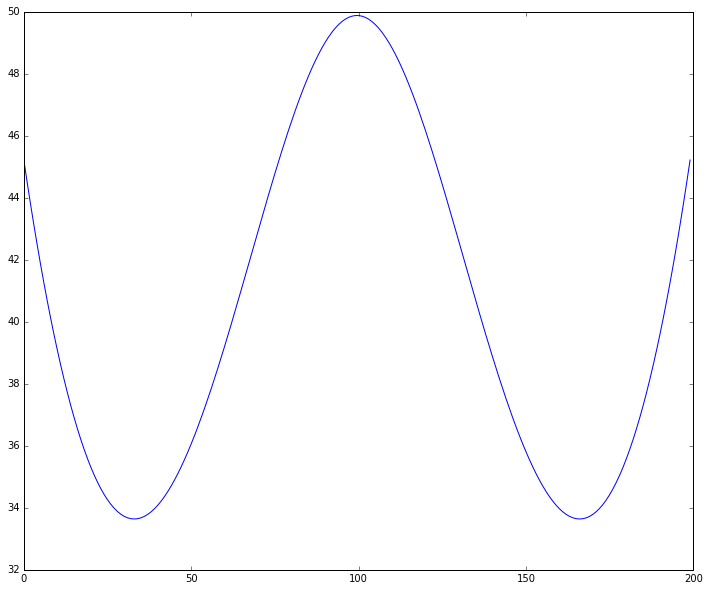

In [207]:
plt.plot(t[:,50,50])

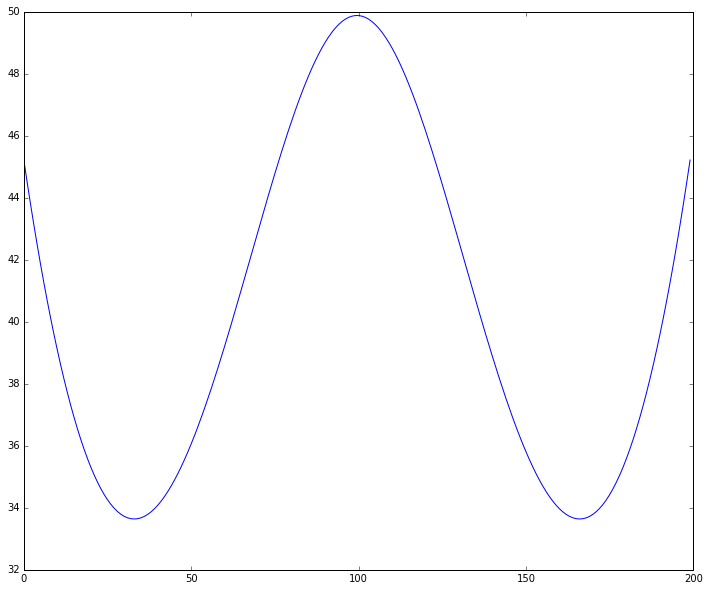

In [208]:
plt.plot(abs(t[:,50,50]))

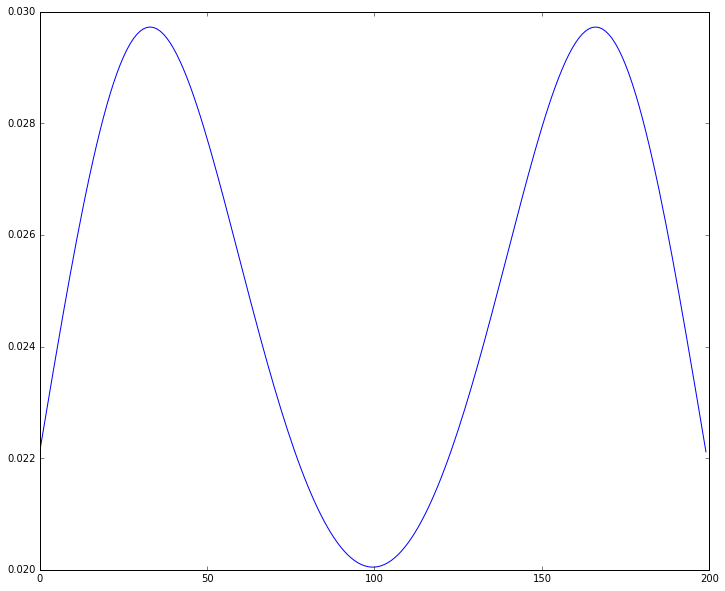

In [209]:
plt.plot(1/abs(t[:,50,50]))

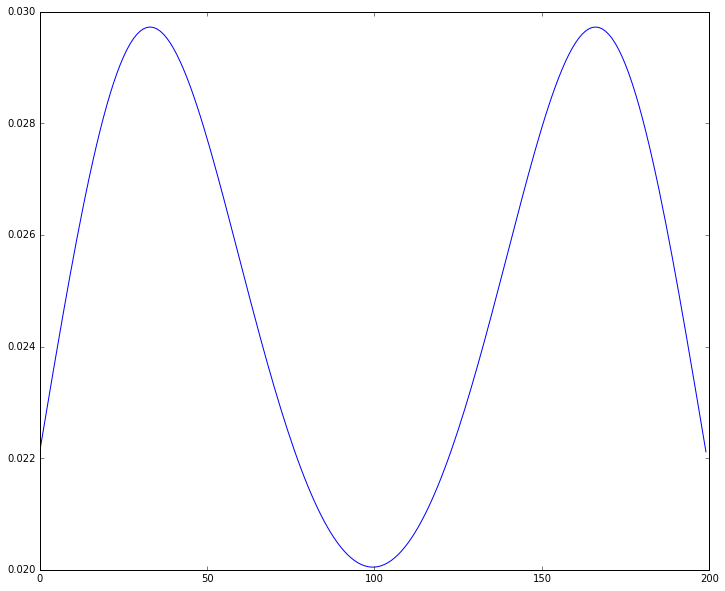

In [210]:
plt.plot(1/abs(t[:,50,50]))

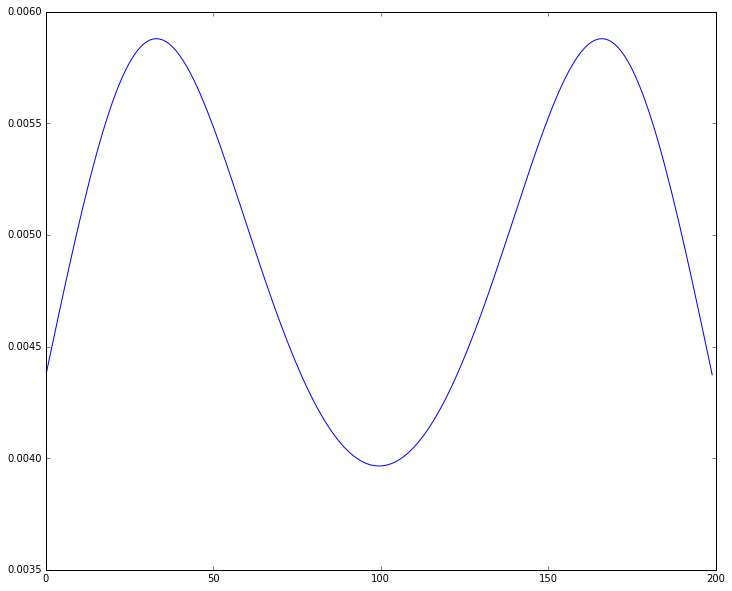

In [211]:
p = np.clip(1/abs(t[:,50,50]), 0, 50) 
# NOTE 50 happens to be a good choice of clipping for this set, what's a method of coming up with this automatically?
p /= p.sum()
plt.plot(p)

In [212]:
np.percentile(1/abs(t[:,50,50]), 95)

0.029655326085776978

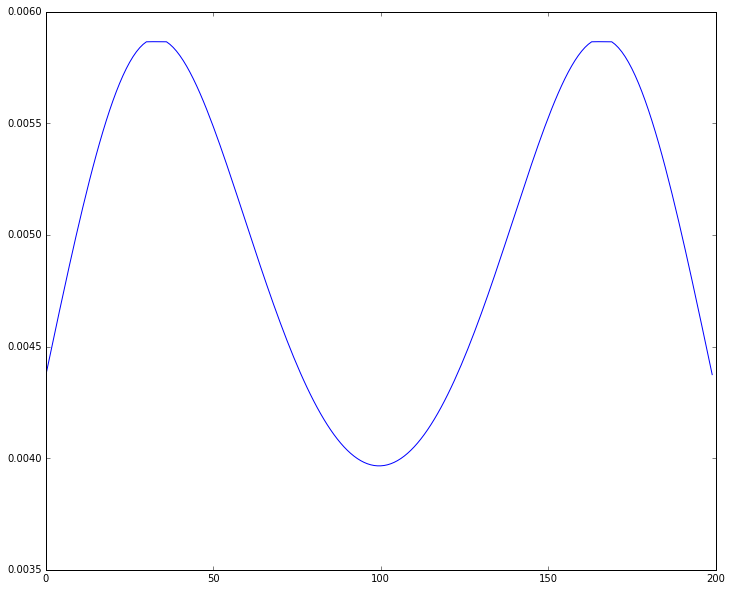

In [213]:
percentile = np.percentile(1/abs(t[:,50,50]), 95)
p = np.clip(1/abs(t[:,50,50]), 0, percentile) 
# NOTE 100 happens to be a good choice of clipping for this set, what's a method of coming up with this automatically?
p /= p.sum()
plt.plot(p)

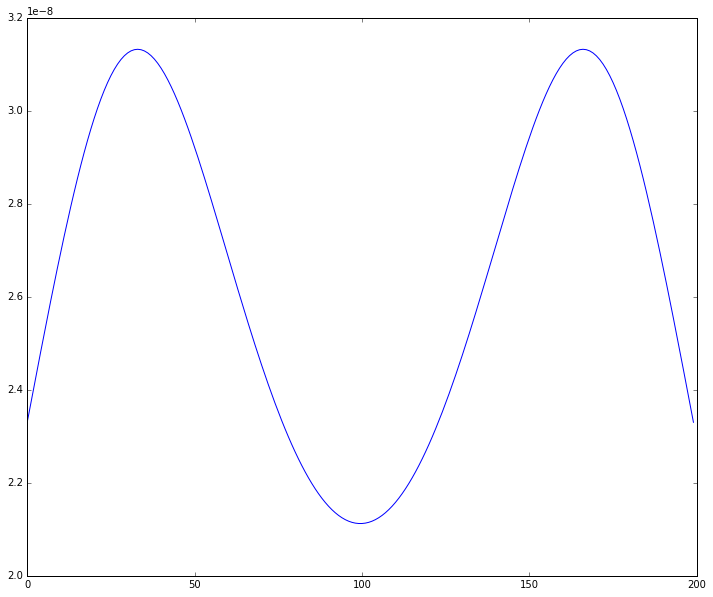

In [214]:
percentile = np.percentile(1/abs(t), 99)
p = np.clip(1/abs(t), 0, percentile) 
p /= p.sum()

plt.plot(p[:,50,50])

# Doesn't look at good, why? because we're looking at percentile in all 3 dimensions, e.g. this may be a trait
# of the dimensionality curse. It's logical to assume that in 4 dimensions we'd want an even higher percientile...

# Also Note that these are incredibly small values 1e-8...
# we have to do this by dimension if it's going to work well...

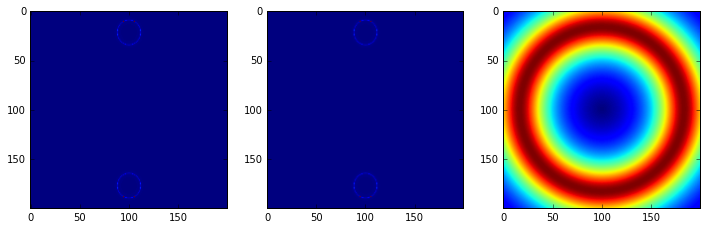

In [215]:
percentile = np.percentile(1/abs(t), 99)
p = 1/abs(t)
#p = np.clip(p, 0, percentile) 
p /= p.sum()

slice_idx = 70
for axis in range(len(t.shape)):
    plt.subplot(1,3,axis+1)
    if axis == 0:
        plt.imshow(p[slice_idx,:,:], label='axis %s' % axis)
    elif axis == 1:
        plt.imshow(p[:,slice_idx,:], label='axis %s' % axis)
    elif axis == 2:
        plt.imshow(p[:,:,slice_idx], label='axis %s' % axis)

In [216]:
p.flatten().shape

(8000000,)

In [217]:
p.flatten().sum()

0.99999999999999956

In [218]:
n_samples = 10000
flat_samples = np.random.choice(len(t.flatten()), size=n_samples, replace=True, p=p.flatten())
flat_samples

array([5082306, 5564911, 6936090, ...,  972088, 1651696, 1390911])

In [219]:
samples = np.unravel_index(flat_samples, t.shape)
samples

(array([127, 139, 173, ...,  24,  41,  34]),
 array([ 11,  24,  80, ...,  60,  58, 154]),
 array([106, 111,  90, ...,  88,  96, 111]))

In [220]:
A[samples[0]]

array([ 3.31658291,  4.7638191 ,  8.86432161, ..., -9.10552764,
       -7.05527638, -7.89949749])

In [221]:
xs = A[samples[0]]
ys = A[samples[1]]
zs = A[samples[2]]

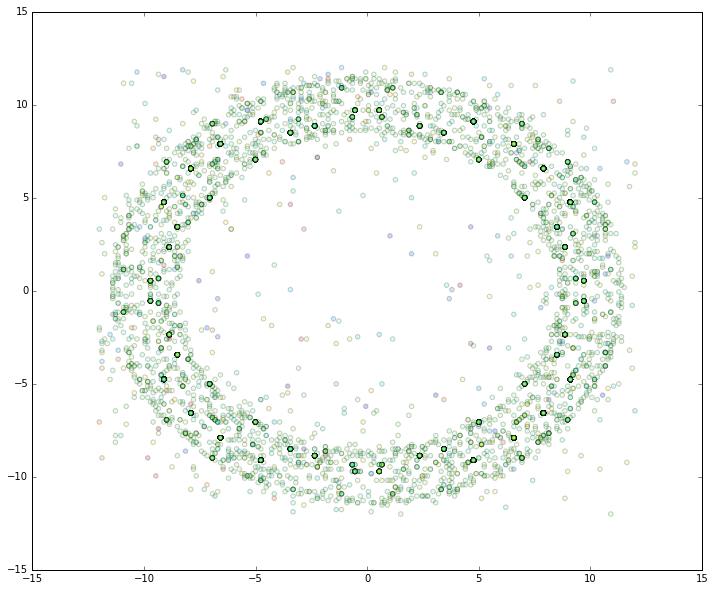

In [222]:
plt.scatter(xs, ys, c=zs, alpha=0.2);

In [249]:
# CONVERSION METHODS BETWEEN PARAMETRIC AND IMPLICIT CURVES AND SURFACES *
# http://www.dtic.mil/dtic/tr/fulltext/u2/a228715.pdf

In [ ]:
# gallery of implicit surfaces, could be fun to try some of these
# http://xrt.wikidot.com/gallery:implicit

In [ ]:
# https://www.reddit.com/r/hypershape/comments/54m4t2/tree_graphs_of_a000669_for_spheres_and_higher/

def T3(x1,x2,x3,x4):
    """(((II)I)I)"""
    #return ((x**2 + y**2)**(1/2) - r1)**2 + z**2 - r2
    
    
    return ((x1**2 + x2**2)**(1/2) - r1)**2 + x3**2 - r2
    